## FOR PRICE PREDICTION

## Importing libraries and packages

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,confusion_matrix, mean_squared_error


## Loading and reading the dataset

In [2]:
pd.set_option('display.max_columns', None)
dr = pd.read_csv('cleaned_airbnb.csv')
dr

,id,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
0,1001254,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Private room,1970-01-01 00:00:00.000002020,966.000000,193.000000,10,9,2021-10-19,0.21,4,6,286
1,1002102,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,moderate,Entire home/apt,1970-01-01 00:00:00.000002007,142.000000,28.000000,30,45,2022-05-21,0.38,4,2,228
2,1002403,78829239556,unconfirmed,Elise,Manhattan,Harlem,40.80902,-73.94190,True,flexible,Private room,1970-01-01 00:00:00.000002005,620.000000,124.000000,3,0,2019-06-14,0.79,5,1,352
3,1002755,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,True,moderate,Entire home/apt,1970-01-01 00:00:00.000002005,368.000000,74.000000,30,270,2019-07-05,4.64,4,1,322
4,1003689,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,Entire home/apt,1970-01-01 00:00:00.000002009,204.000000,41.000000,10,9,2018-11-19,0.10,3,1,289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69276,57361342,29964876857,verified,NaN,Brooklyn,Bushwick,40.69370,-73.91006,True,flexible,Private room,1970-01-01 00:00:00.000002016,624.724597,124.891599,5,3,2018-04-09,0.11,1,1,178
69277,57361894,92852058426,unconfirmed,NaN,Brooklyn,Williamsburg,40.71284,-73.96284,False,moderate,Private room,1970-01-01 00:00:00.000002005,624.724597,124.891599,7,15,2018-01-01,0.55,4,1,178
69278,57362446,95572379802,verified,NaN,Manhattan,Upper West Side,40.79563,-73.97634,True,flexible,Entire home/apt,1970-01-01 00:00:00.000002010,624.724597,124.891599,3,38,2019-06-10,1.40,3,1,31
69279,57362999,80154173698,verified,NaN,Manhattan,Hell's Kitchen,40.76125,-73.98945,True,strict,Entire home/apt,1970-01-01 00:00:00.000002020,624.724597,124.891599,1,81,2019-03-05,2.96,2,2,178


## Making a copy of the dataset


In [3]:
airbnb = dr.copy()

## Preparing the dataset for Prediction

In [4]:
airbnb.head()

,id,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
0,1001254,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Private room,1970-01-01 00:00:00.000002020,966.0,193.0,10,9,2021-10-19,0.21,4,6,286
1,1002102,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,moderate,Entire home/apt,1970-01-01 00:00:00.000002007,142.0,28.0,30,45,2022-05-21,0.38,4,2,228
2,1002403,78829239556,unconfirmed,Elise,Manhattan,Harlem,40.80902,-73.94190,True,flexible,Private room,1970-01-01 00:00:00.000002005,620.0,124.0,3,0,2019-06-14,0.79,5,1,352
3,1002755,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,True,moderate,Entire home/apt,1970-01-01 00:00:00.000002005,368.0,74.0,30,270,2019-07-05,4.64,4,1,322
4,1003689,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,Entire home/apt,1970-01-01 00:00:00.000002009,204.0,41.0,10,9,2018-11-19,0.10,3,1,289


In [5]:
# Checking for null values
airbnb.isna().sum()

id                                  0
host_id                             0
host_identity_verified              0
host_name                         313
neighbourhood_group                 0
neighbourhood                       0
lat                                 0
long                                0
instant_bookable                    0
cancellation_policy                 0
room_type                           0
construction_year                   0
price                               0
service_fee                         0
minimum_nights                      0
number_of_reviews                   0
last_review                         0
reviews_per_month                   0
review_rate_number                  0
calculated_host_listings_count      0
availability_365                    0
dtype: int64

In [6]:
# Checking for duplicates
airbnb.duplicated().sum()

0

In [7]:
# Displaying the number of rows and columns in the dataset
airbnb.shape

(69281, 21)

### Displaying all columns in the dataset

In [8]:
airbnb.columns

Index(['id', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long',
       'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

### Removing unnecessary columns in the dataset

In [9]:
# Removing unnecessary columns
airbnb.drop(columns=['id', 'host_id', 'host_identity_verified', 'host_name', 'neighbourhood', 'lat', 'last_review', 'long', 'instant_bookable', 'cancellation_policy', 'construction_year', 'review_rate_number', 'minimum_nights'], inplace=True )

In [10]:
# Displaying the dataset
airbnb.head()

,neighbourhood_group,room_type,price,service_fee,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,966.0,193.0,9,0.21,6,286
1,Manhattan,Entire home/apt,142.0,28.0,45,0.38,2,228
2,Manhattan,Private room,620.0,124.0,0,0.79,1,352
3,Brooklyn,Entire home/apt,368.0,74.0,270,4.64,1,322
4,Manhattan,Entire home/apt,204.0,41.0,9,0.10,1,289


<AxesSubplot:>

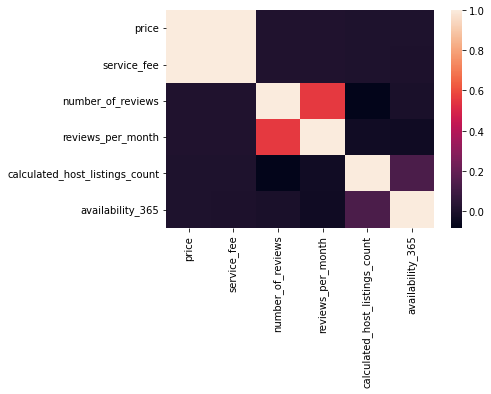

In [11]:
# Checking how the features correlate with one another
sns.heatmap(airbnb.corr())

### Preprocessing the dataset by changing the column

In [12]:
label = LabelEncoder()

# For Neighbourhood group
label.fit(airbnb.neighbourhood_group.drop_duplicates())
airbnb.neighbourhood_group = label.transform(airbnb.neighbourhood_group)

# For room_type
label.fit(airbnb.room_type.drop_duplicates())
airbnb.room_type = label.transform(airbnb.room_type)

airbnb

,neighbourhood_group,room_type,price,service_fee,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1,2,966.000000,193.000000,9,0.21,6,286
1,2,0,142.000000,28.000000,45,0.38,2,228
2,2,2,620.000000,124.000000,0,0.79,1,352
3,1,0,368.000000,74.000000,270,4.64,1,322
4,2,0,204.000000,41.000000,9,0.10,1,289
...,...,...,...,...,...,...,...,...
69276,1,2,624.724597,124.891599,3,0.11,1,178
69277,1,2,624.724597,124.891599,15,0.55,1,178
69278,2,0,624.724597,124.891599,38,1.40,1,31
69279,2,0,624.724597,124.891599,81,2.96,2,178


In [13]:
# Sorting the dataset
airbnb.sort_values('price', inplace=True)
airbnb.head()

,neighbourhood_group,room_type,price,service_fee,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
45527,3,2,50.0,10.0,0,0.79,6,62
8889,1,2,50.0,10.0,0,0.79,1,162
50568,1,0,50.0,10.0,2,0.56,1,1
62341,3,0,50.0,10.0,7,0.10,3,365
68226,1,0,50.0,10.0,3,0.08,1,178


In [14]:
airbnb.reset_index(inplace=True)

In [15]:

airbnb.drop(['index'], axis=1, inplace=True)

In [16]:
airbnb.head()

,neighbourhood_group,room_type,price,service_fee,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,3,2,50.0,10.0,0,0.79,6,62
1,1,2,50.0,10.0,0,0.79,1,162
2,1,0,50.0,10.0,2,0.56,1,1
3,3,0,50.0,10.0,7,0.10,3,365
4,1,0,50.0,10.0,3,0.08,1,178


## Extracting the independent and dependent variables


In [17]:
X = airbnb.drop(['price'], axis=1)
y = airbnb[['price']]

In [18]:
X.head()

,neighbourhood_group,room_type,service_fee,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,3,2,10.0,0,0.79,6,62
1,1,2,10.0,0,0.79,1,162
2,1,0,10.0,2,0.56,1,1
3,3,0,10.0,7,0.10,3,365
4,1,0,10.0,3,0.08,1,178


## Dividing into training and test sets


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
X_new= pd.DataFrame(X_test)
X_new['price'] = y_test


In [21]:
# Sorting the dataset
X_new.sort_values('price', inplace=True)


X_new.reset_index(inplace=True)

X_new.drop(['index'], axis=1, inplace=True)

In [22]:
X_test = X_new.drop(['price'], axis=1)
y_test = X_new['price']

In [23]:
X_new.head()

,neighbourhood_group,room_type,service_fee,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
0,3,2,10.0,1,0.37,3,365,50.0
1,2,0,10.0,0,0.79,1,28,50.0
2,3,2,10.0,1,0.21,1,37,50.0
3,2,3,10.0,174,3.17,6,45,50.0
4,1,2,10.0,2,0.59,17,347,50.0


## Training the model with the train set

In [24]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [25]:
# Checking the shape of train test
X_train.shape

(48496, 7)

In [26]:
# Checking the shape of the test set
X_test.shape

(20785, 7)

## Predicting the test set results

In [27]:
y_pred = linear_model.predict(X_test)
y_pred

array([[  51.76216256],
       [  51.85015747],
       [  51.60897179],
       ...,
       [1198.65035252],
       [1198.59344303],
       [1198.75334674]])


## Testing the model

In [28]:
pred = pd.DataFrame(X_test)
pred['actual_price'] = y_test
pred['pred_price'] = y_pred
pred

,neighbourhood_group,room_type,service_fee,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,actual_price,pred_price
0,3,2,10.0,1,0.37,3,365,50.0,51.762163
1,2,0,10.0,0,0.79,1,28,50.0,51.850157
2,3,2,10.0,1,0.21,1,37,50.0,51.608972
3,2,3,10.0,174,3.17,6,45,50.0,51.457569
4,1,2,10.0,2,0.59,17,347,50.0,51.887968
...,...,...,...,...,...,...,...,...,...
20780,1,0,240.0,10,0.29,1,11,1200.0,1198.701296
20781,2,0,240.0,48,0.46,1,202,1200.0,1198.653411
20782,1,2,240.0,8,0.43,1,178,1200.0,1198.650353
20783,2,2,240.0,0,0.79,1,178,1200.0,1198.593443


## Evaluating the model

In [29]:
# Calculating the r2 score
from sklearn.metrics import r2_score
we = r2_score(y_test, y_pred)
print('The R2 Error is:', we)

The R2 Error is: 0.9937918306154782


In [30]:
# Calculating the Root Mean Squared Error
import math
MSE = mean_squared_error(y_test, y_pred)
RMSE = math.sqrt(MSE)
print('The Root Mean Square Error is:', RMSE)

The Root Mean Square Error is: 26.054169971137423


#### This shows that the Linear Regression model for predicting the price of Airbnb listings works accurately.

## LOCATION PREDICTION

In [31]:
# Making a copy of the datset
dt = dr.copy()

In [32]:
#Displaying the first 5 rows of the dataset
dt.head()

,id,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
0,1001254,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Private room,1970-01-01 00:00:00.000002020,966.0,193.0,10,9,2021-10-19,0.21,4,6,286
1,1002102,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,moderate,Entire home/apt,1970-01-01 00:00:00.000002007,142.0,28.0,30,45,2022-05-21,0.38,4,2,228
2,1002403,78829239556,unconfirmed,Elise,Manhattan,Harlem,40.80902,-73.94190,True,flexible,Private room,1970-01-01 00:00:00.000002005,620.0,124.0,3,0,2019-06-14,0.79,5,1,352
3,1002755,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,True,moderate,Entire home/apt,1970-01-01 00:00:00.000002005,368.0,74.0,30,270,2019-07-05,4.64,4,1,322
4,1003689,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,Entire home/apt,1970-01-01 00:00:00.000002009,204.0,41.0,10,9,2018-11-19,0.10,3,1,289


### Display  the columns in the dataset

In [33]:
dt.columns

Index(['id', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long',
       'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

### Remove columns that are not needed for prediction

In [34]:
dt.drop(columns=['id', 'host_id', 'host_identity_verified', 'host_name', 'construction_year', 'instant_bookable', 'cancellation_policy', 'reviews_per_month','service_fee', 'last_review', 'review_rate_number', 'calculated_host_listings_count'], inplace=True)

### Display the dataset

In [35]:
dt.head()

,neighbourhood_group,neighbourhood,lat,long,room_type,price,minimum_nights,number_of_reviews,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,966.0,10,9,286
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,142.0,30,45,228
2,Manhattan,Harlem,40.80902,-73.94190,Private room,620.0,3,0,352
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,368.0,30,270,322
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,204.0,10,9,289


### Preprocessing the dataset

In [36]:
label = LabelEncoder()

# For Neighbourhood groups
label.fit(dt.neighbourhood_group.drop_duplicates())
dt.neighbourhood_group = label.transform(dt.neighbourhood_group)

# For Neighbourhood
label.fit(dt.neighbourhood.drop_duplicates())
dt.neighbourhood = label.transform(dt.neighbourhood)

# For room_type
label.fit(dt.room_type.drop_duplicates())
dt.room_type = label.transform(dt.room_type)

dt

,neighbourhood_group,neighbourhood,lat,long,room_type,price,minimum_nights,number_of_reviews,availability_365
0,1,111,40.64749,-73.97237,2,966.000000,10,9,286
1,2,130,40.75362,-73.98377,0,142.000000,30,45,228
2,2,97,40.80902,-73.94190,2,620.000000,3,0,352
3,1,42,40.68514,-73.95976,0,368.000000,30,270,322
4,2,62,40.79851,-73.94399,0,204.000000,10,9,289
...,...,...,...,...,...,...,...,...,...
69276,1,28,40.69370,-73.91006,2,624.724597,5,3,178
69277,1,217,40.71284,-73.96284,2,624.724597,7,15,178
69278,2,205,40.79563,-73.97634,0,624.724597,3,38,31
69279,2,98,40.76125,-73.98945,0,624.724597,1,81,178


### Extract Independent and Dependent Variables

In [37]:
X_log = dt.drop('neighbourhood_group', axis=1)
y_log = dt[['neighbourhood_group']]

### Dividing into Train and test sets

In [38]:
X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(X_log, y_log, test_size=0.3, random_state=42)

In [39]:
# Checking the column of the train test of X
X_log_train

,neighbourhood,lat,long,room_type,price,minimum_nights,number_of_reviews,availability_365
24443,13,40.68347,-73.93322,2,690.0,3,2,178
34957,19,40.68783,-73.98695,0,1178.0,2,31,25
65761,204,40.77196,-73.95669,0,674.0,30,2,210
12287,97,40.82243,-73.95447,2,1104.0,30,10,165
41960,74,40.70659,-74.01020,0,844.0,2,8,247
...,...,...,...,...,...,...,...,...
37194,88,40.67022,-73.99140,0,120.0,3,13,178
6265,13,40.68402,-73.94164,0,726.0,1,40,352
54886,13,40.68438,-73.95832,0,409.0,2,121,294
860,97,40.80343,-73.95310,2,764.0,3,47,274


In [40]:
y_log_train

,neighbourhood_group
24443,1
34957,1
65761,2
12287,2
41960,2
...,...
37194,1
6265,1
54886,1
860,2


### Train the Model

In [41]:
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(X_log_train,y_log_train)

C:\Users\User1\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=10.0, random_state=0, solver='liblinear')

### Predict test set results

In [42]:
y_log_pred = model.predict(X_log_test)

### Evaluate the model

In [43]:
# From Logistic, get the score of accuracy
score = model.score(X_log_test, y_log_test)
print('The Accuracy Score is:', score)

The Accuracy Score is: 0.6474380562905941


In [44]:
# To get the confusion matrix
cm = confusion_matrix(y_log_test, y_log_pred)

Text(0.5, 1.0, 'Accuracy Score: 0.6474380562905941')

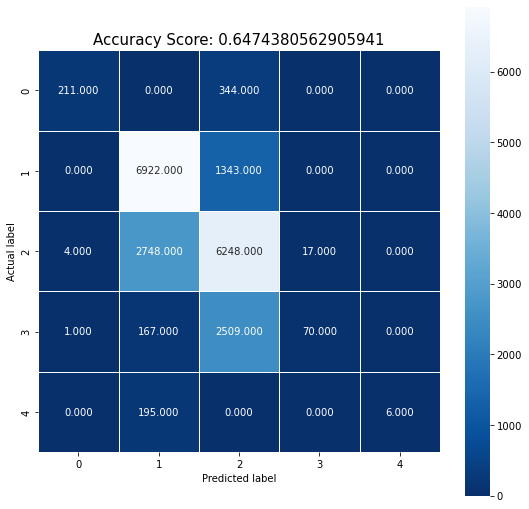

In [45]:
# Recreate the confusion matrix in a heat map
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt='.3f', linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {}'.format(score)
plt.title(all_sample_title, size = 15)